<a href="https://colab.research.google.com/github/10KimJunGu/pythonadv/blob/main/7_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.회귀분석(Regression)

* 독립변수(x)로 종속변수(y)를 예측하는 것을 의미
* 독립변수 : 변수의 변화 원인이 모형 밖에 있는 변수
* 종속변수 : 변수의 변화 원인이 모형 안에 있는 변수


In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True) # 소수점이 길더라도 펼쳐서 보여줌 # 많이 크면 반올림해서 보여줌

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
# target 데이터가 정답데이터임
# target데이터는 MEDV 이다.

In [5]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


* CRIM: 범죄율
* ZN: 25,000평방 피트 당 주거용 토지의 비율
* INDUS: 비소매(non-retail) 비즈니스 면적 비율
* CHAS: 찰스 강 더미 변수(통로가 하천을 향하면 1, 그렇지 않으면 0)
* NOX: 산화 질소 농도(천만 분의 1)
* RM: 주거 당 평균 객실 수
* AGE: 1940년 이전에 건축된 자가 소유 점유 비율
* DIS: 5개의 보스턴 고용 센터까지의 가중 거리
* RAD: 고속도로 접근성 지수
* TAX: 10,000달러 당 전체 가치 재산 비율
* PTRATIO: 도시 별 학생, 교사 비율
* B: 1000(Bk-0.63)^2 여기서 Bk는 도시 별 검정 비율
* LSTAT: 인구의 낮은 지위
* MEDV: 자가 주택의 중앙값(1,000달러 단위)


In [8]:
df['MEDV'] = data['target']  # target데이터인 'MEDV'를 뒤에 추가

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'], test_size=0.2, random_state=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [12]:
# x_train은 MEDV를 제외한 전부, y_train에서는 MEDV만 

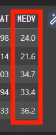

In [13]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [14]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69


In [15]:
y_train.shape, y_test.shape

((404,), (102,))

In [16]:
y_train.head()

50     19.7
367    23.1
34     13.5
78     21.2
172    23.1
Name: MEDV, dtype: float64

In [17]:
##############################################

In [18]:
# 광고에 따른 클릭 수
import matplotlib.pyplot as plt

In [19]:
#  click = pd.read_csv('click.csv')
# plt.plot(click.x, click.y, 'o')
# 광고비가 200원일 때 대략 500번 클릭률이 나오는 것을 알 수 있음
# 데이터를 읽어 학습하고 예측값을 찾는 것 -> 머신러닝

In [20]:
# y = ax + b (a : 기울기, b : y절편)
# 최소제곱법
# 광고비 x , 광고비 y
# 59, 139
# 85, 308
# 99, 334
# 112, 387

# f(x) = 1 + 2x
# 119, 171, 199, 225

# y = f(x) 이상적인 형태
# y - f(x) = 0 모든 점에 생기는 오차의 한계가 가장 작아지도록 함



# 2. 평가 지표 만들기

### 2-1. MSE(Mean Squared Error)
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값
* ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


### 2-2. MAE(Mean Absolute Error)
* 예측값과 실제값의 차이에 대한 절대값에 대하여 평균을 낸 값
* $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$


### 2-3. RMSE(Root Mean Squared Error)
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 후 루트를 씌운 값
* $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


In [21]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [22]:
def my_mse(pred, actual):
  return((pred - actual) ** 2).mean()

In [23]:
my_mse(pred, actual)

4.0

In [24]:
def my_mae(pred, actual):
  return np.abs(pred - actual).mean()  # abs : 절대값

In [25]:
my_mae(pred, actual)

2.0

In [26]:
def my_rmse(pred, actual):
  return np.sqrt(my_mse(pred, actual))  # sqrt : 루트

In [27]:
my_rmse(pred, actual)

2.0

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error  # 사이킷런에 있는 평가지표

In [29]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [30]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

def plot_predictions(name_, pred, actual): # name : 사이킷런에 있는 모델을 넣을 것, pred : 예측값, actual : 실제값
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True) # 'actual'로 sort 시킬것, drop=True : 화면에는 인덱스값이 보이지 않음

  plt.figure(figsize=(12, 9))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

def mse_eval(name_, pred, actual):
  global my_predictions  # global : 전역변수, 밖에서 선언한 변수를 안에서 쓰는
  global colors

  plot_predictions(name_, pred, actual)

# mse_eval(name_, pred, actual)가 불리면 그 값을 받아다가 plot_predictions(name_, pred, actual)여기에 불러준다.
# 그러면 plot_predictions(name_, pred, actual)안에 있는 df ~ plt.show() 내용을 전부 불러서 그림을 그린다. 

  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse

  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)  # my_predictions안에 있는 items()를 sort해서 key에다가 넣는다.
  # sort가 오름차순이므로 reverse=True해서 내림차순으로

  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)

  min_ = df['mse'].min() - 10 # 별의미없음 # 그래프그릴때 범위를 주기위해
  max_ = df['mse'].max() + 10 # 별의미없음 # 그래프그릴때 범위를 주기위해

  length = len(df)

  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df))) 
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])

  for i, v in enumerate(df['mse']):  # i랑 v 둘다 사용하기 위해 enumerate함수 사용  # df['mse']에서 i에는 index값이, v에는 value값이 들어간다
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx]) # bars데이터가 [0]번부터 시작해서
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold') # v : 실제값 , round(v, 3) : 소숫점 셋째자리까지 표현

  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)

  plt.show()


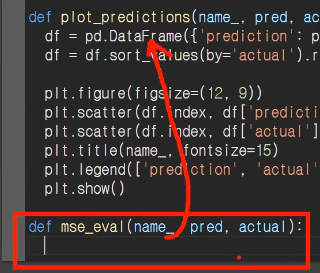

# 3. LinearRegression (선형회귀)

[도큐먼트] (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression(n_jobs = -1) # n_jobs : cpu코어의 사용 ( -1은 코어를 전부 사용하겠다라는 뜻)

In [34]:
model.fit(x_train, y_train) # x_train : 문제, y_train : 답 -> 을 넣어서 학습을 시킴

LinearRegression(n_jobs=-1)

In [35]:
pred = model.predict(x_test)  # 예측값

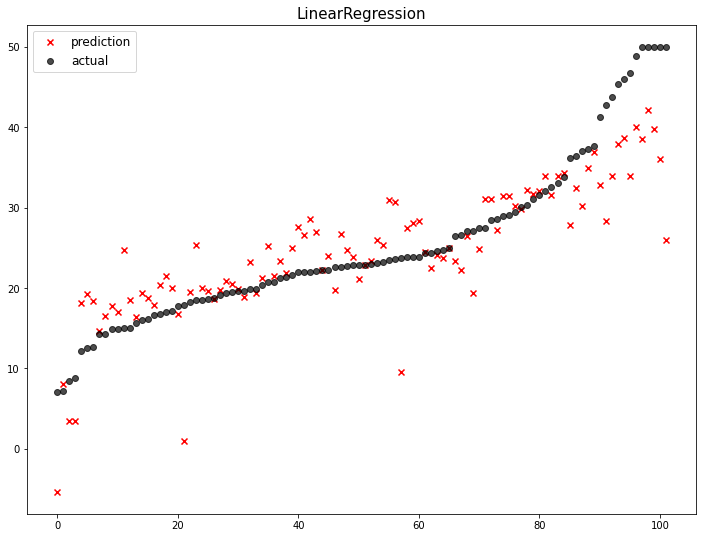

              model        mse
0  LinearRegression  34.413968


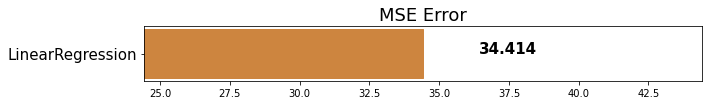

In [36]:
mse_eval('LinearRegression', pred, y_test)

In [37]:
# x표시가 예측값이 찍혀있는 것

# 4. 규제(Regularization)

* 학습이 과대적합 되는 것을 방지하고자 일종의 패널티를 부여하는 것

1. L1 규제
  * 가중치의 합을 더한 값에 규제 강도를 곱하여 오차에 더한 값 ($Error=MSE+α|w|$
)
  * 어떤 가중치는 실제로 0이 됨. 즉, 모델에서 완전히 제외되는 특성이 생길 수 있음
  * 라쏘(Lasso)
2. L2 규제
  * 각 가중치 제곱의 합에 규제 강도를 곱한 값 ($Error=MSE+αw^2$
)
  * 규제 강도를 크게 하면 가중치가 더 많이 감소(규제를 중요시 함)되고, 규제 강도를 작게 하면 가중치가 증가함(규제를 중요시하지 않음)
  * 릿지(Ridge)


In [38]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

### 4-1. 라쏘(Lasso)

In [39]:
from sklearn.linear_model import Lasso

In [40]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

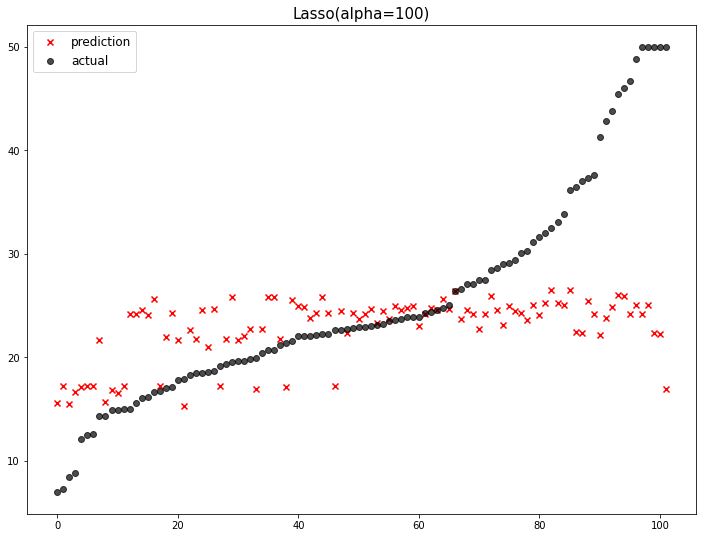

              model        mse
0  Lasso(alpha=100)  93.182655
1  LinearRegression  34.413968


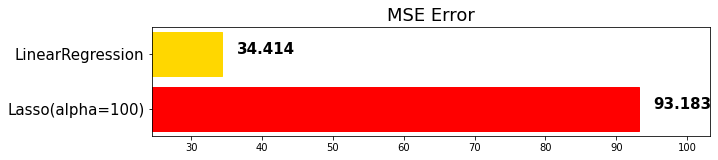

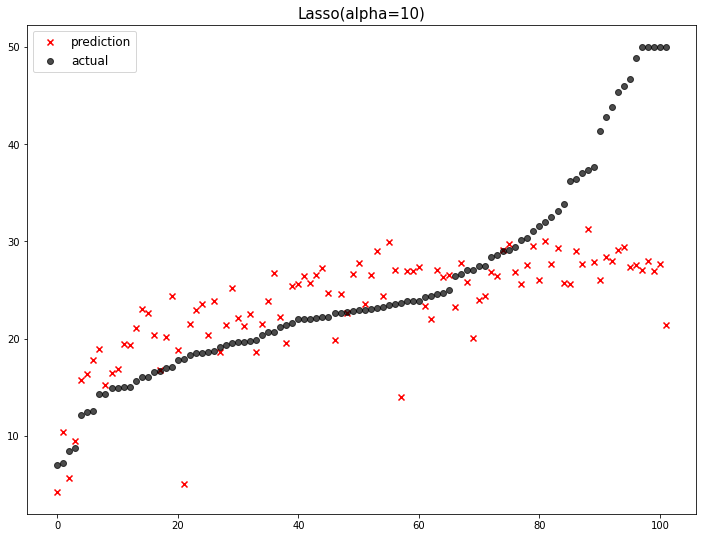

              model        mse
0  Lasso(alpha=100)  93.182655
1   Lasso(alpha=10)  65.517959
2  LinearRegression  34.413968


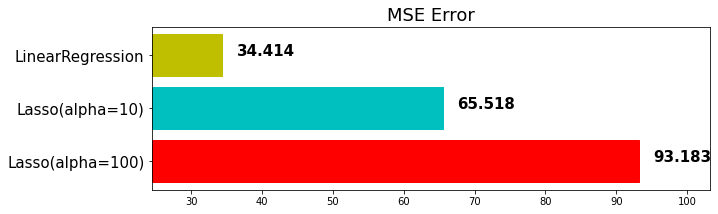

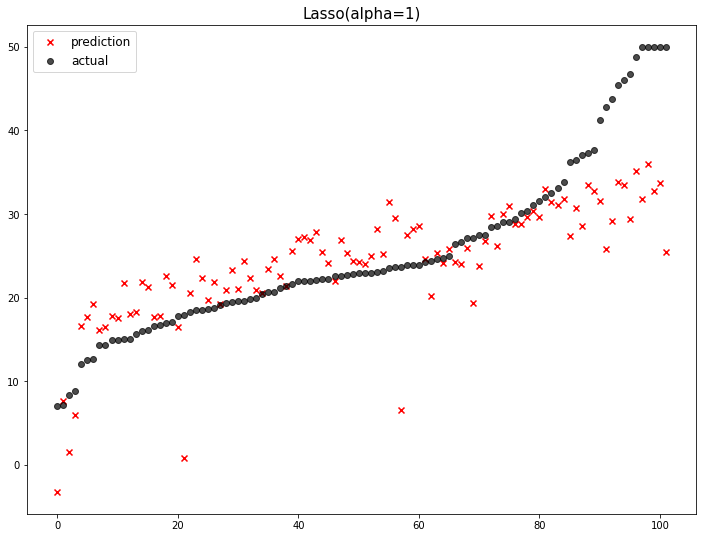

              model        mse
0  Lasso(alpha=100)  93.182655
1   Lasso(alpha=10)  65.517959
2    Lasso(alpha=1)  48.629275
3  LinearRegression  34.413968


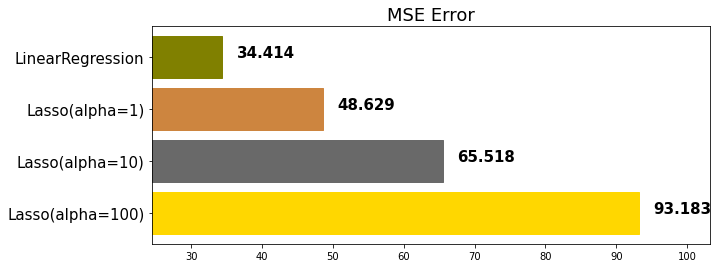

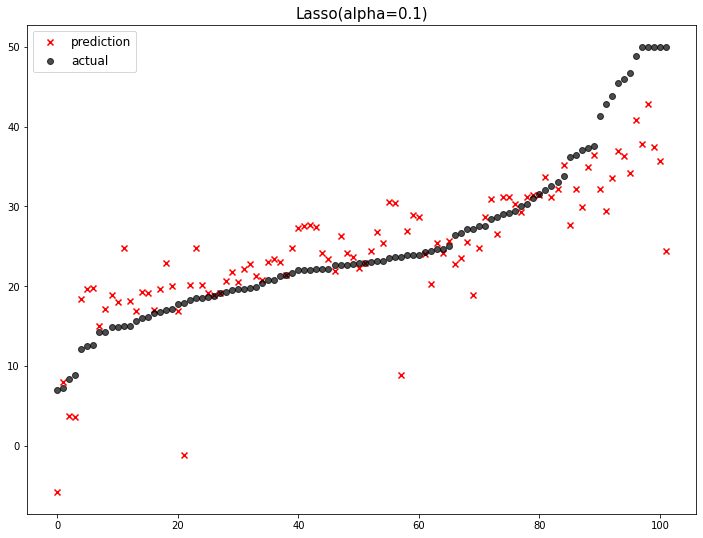

              model        mse
0  Lasso(alpha=100)  93.182655
1   Lasso(alpha=10)  65.517959
2    Lasso(alpha=1)  48.629275
3  Lasso(alpha=0.1)  37.574900
4  LinearRegression  34.413968


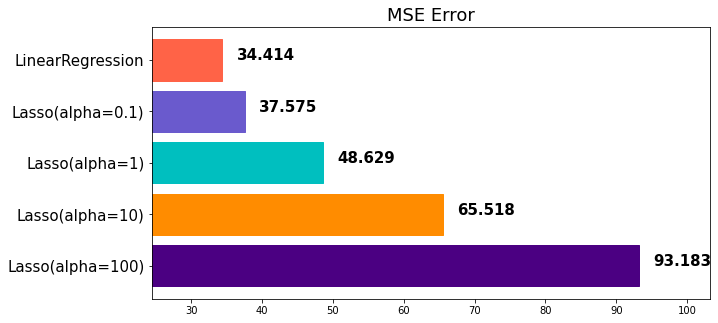

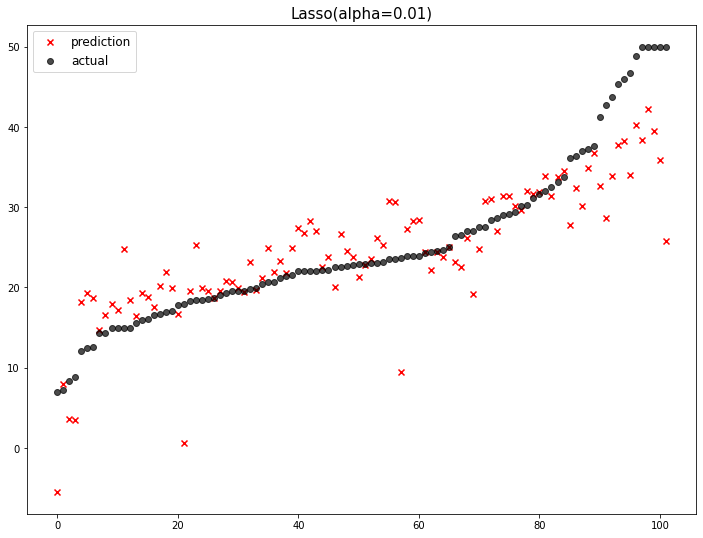

               model        mse
0   Lasso(alpha=100)  93.182655
1    Lasso(alpha=10)  65.517959
2     Lasso(alpha=1)  48.629275
3   Lasso(alpha=0.1)  37.574900
4  Lasso(alpha=0.01)  34.739042
5   LinearRegression  34.413968


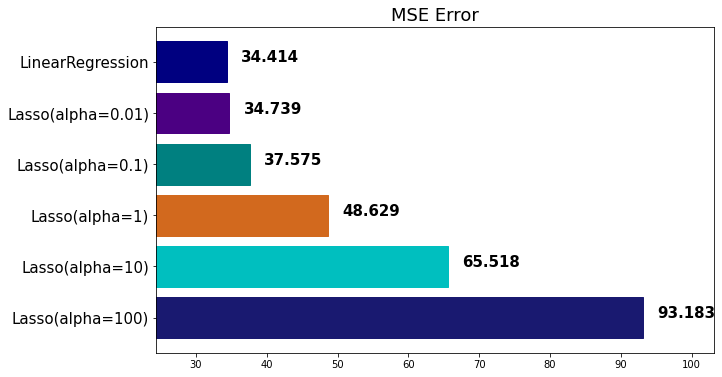

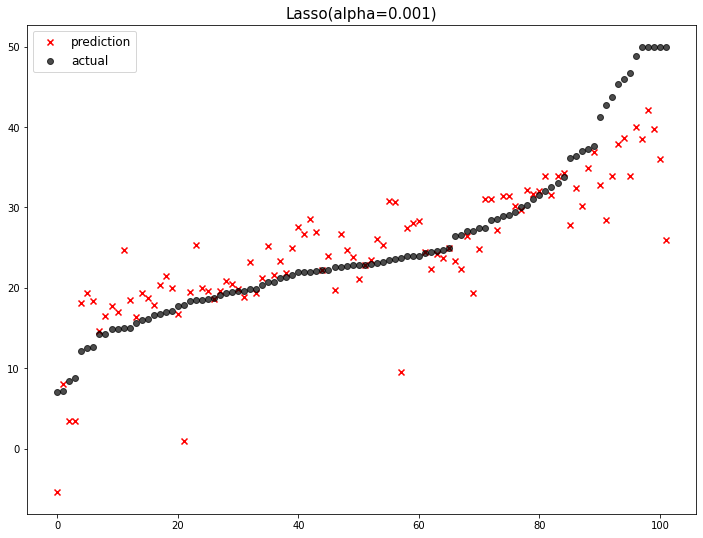

                model        mse
0    Lasso(alpha=100)  93.182655
1     Lasso(alpha=10)  65.517959
2      Lasso(alpha=1)  48.629275
3    Lasso(alpha=0.1)  37.574900
4   Lasso(alpha=0.01)  34.739042
5  Lasso(alpha=0.001)  34.443610
6    LinearRegression  34.413968


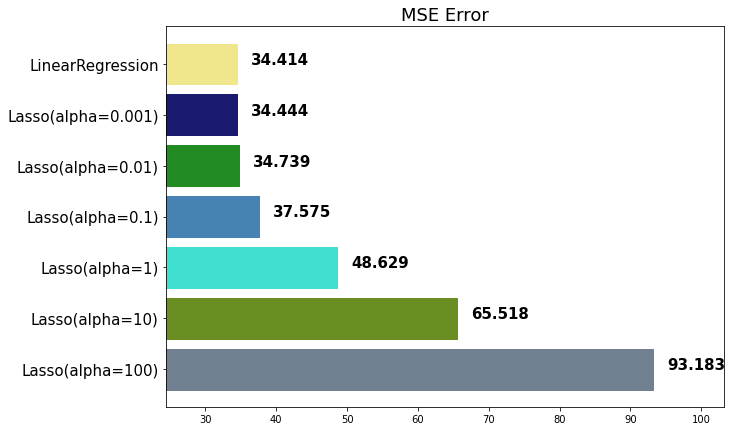

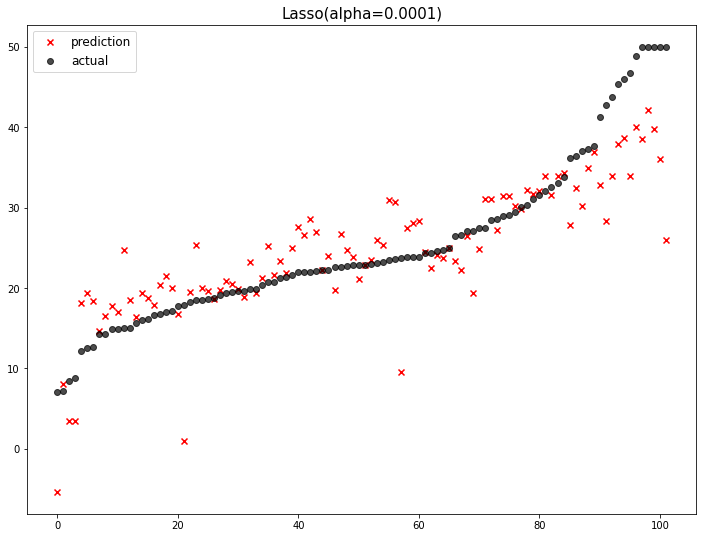

                 model        mse
0     Lasso(alpha=100)  93.182655
1      Lasso(alpha=10)  65.517959
2       Lasso(alpha=1)  48.629275
3     Lasso(alpha=0.1)  37.574900
4    Lasso(alpha=0.01)  34.739042
5   Lasso(alpha=0.001)  34.443610
6  Lasso(alpha=0.0001)  34.416903
7     LinearRegression  34.413968


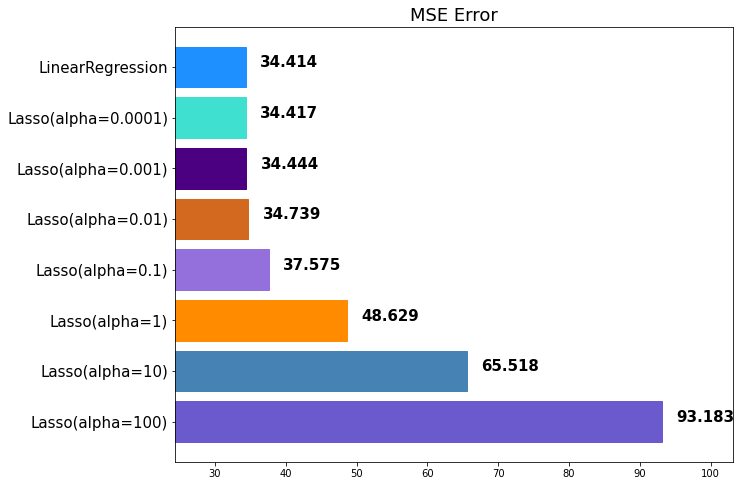

In [41]:
for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(x_train, y_train) # 라쏘를 학습시킴
  pred = lasso.predict(x_test) # x_test를 넣어서 예측시킴
  mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test) # pred : 예측값, y_test : 실제값

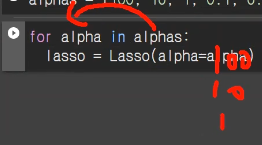

In [42]:
# 100으로 갈수록 심하게 규제를 줘서 거의 다 틀리는 것을 볼 수 있다.

In [43]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_0001 = Lasso(alpha=0.001)
lasso_0001.fit(x_train, y_train)
lasso_pred_0001 = lasso_0001.predict(x_test)

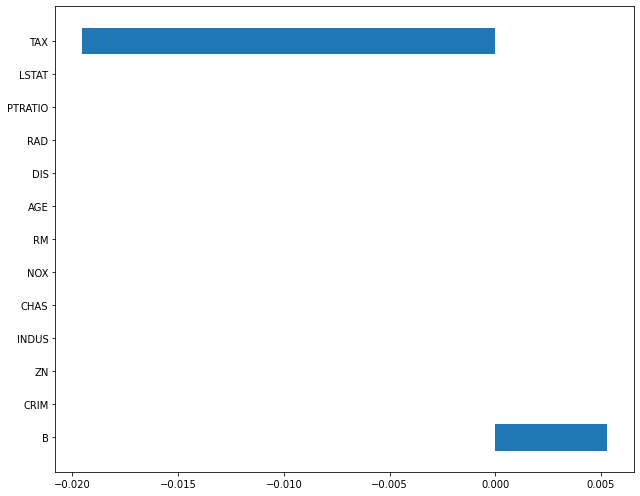

In [44]:
plot_coef(x_train.columns, lasso_100.coef_)

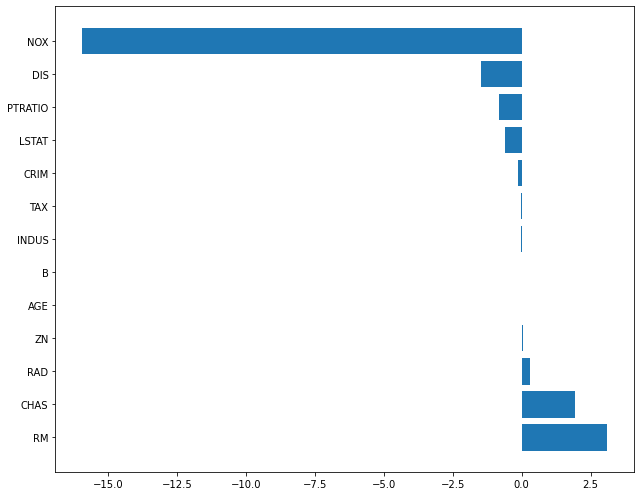

In [45]:
plot_coef(x_train.columns, lasso_0001.coef_)

### 4-2. 릿지(Ridge)

In [46]:
from sklearn.linear_model import Ridge

In [47]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

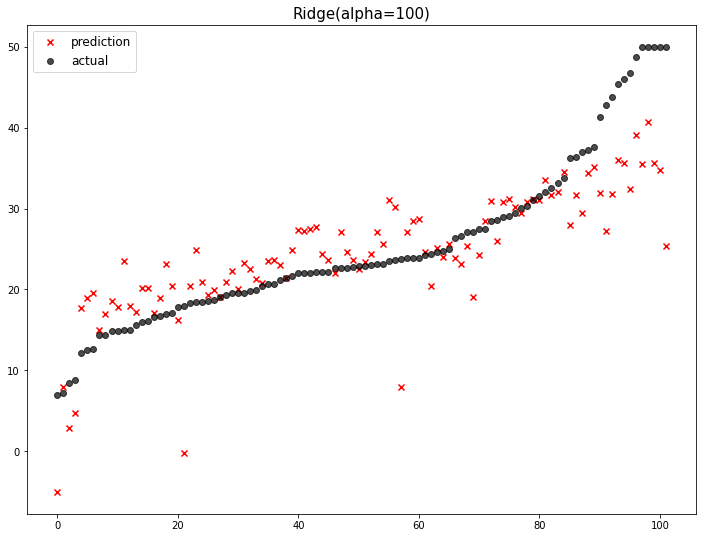

                 model        mse
0     Lasso(alpha=100)  93.182655
1      Lasso(alpha=10)  65.517959
2       Lasso(alpha=1)  48.629275
3     Ridge(alpha=100)  40.655866
4     Lasso(alpha=0.1)  37.574900
5    Lasso(alpha=0.01)  34.739042
6   Lasso(alpha=0.001)  34.443610
7  Lasso(alpha=0.0001)  34.416903
8     LinearRegression  34.413968


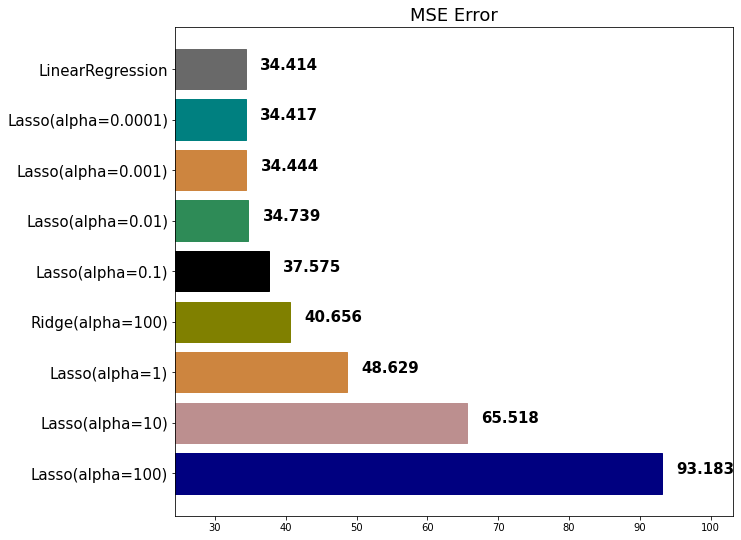

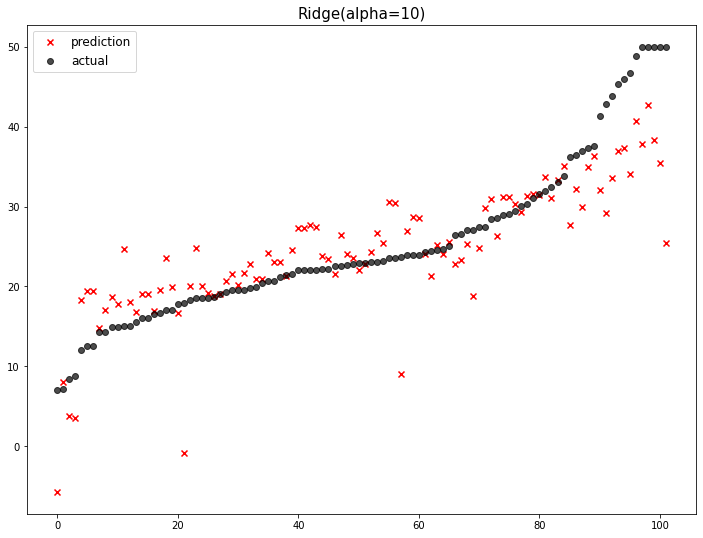

                 model        mse
0     Lasso(alpha=100)  93.182655
1      Lasso(alpha=10)  65.517959
2       Lasso(alpha=1)  48.629275
3     Ridge(alpha=100)  40.655866
4     Lasso(alpha=0.1)  37.574900
5      Ridge(alpha=10)  36.476641
6    Lasso(alpha=0.01)  34.739042
7   Lasso(alpha=0.001)  34.443610
8  Lasso(alpha=0.0001)  34.416903
9     LinearRegression  34.413968


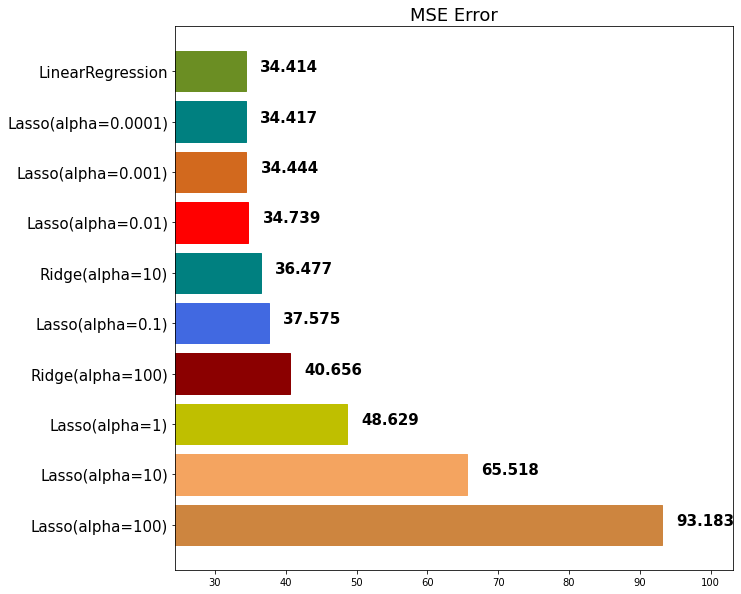

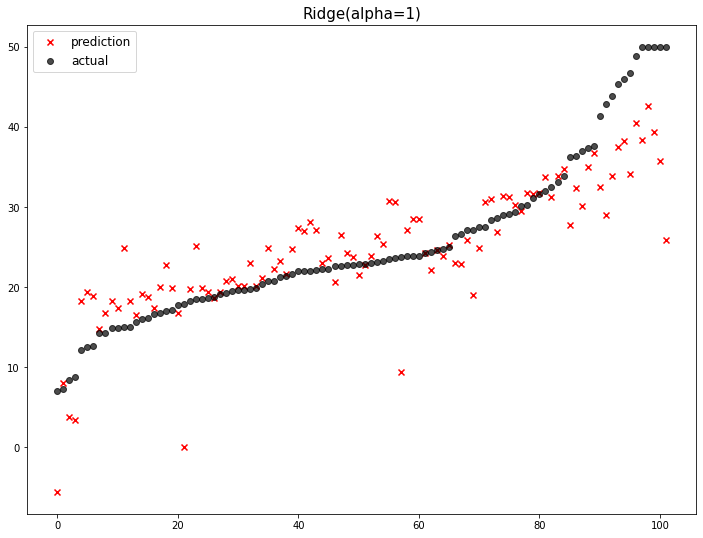

                  model        mse
0      Lasso(alpha=100)  93.182655
1       Lasso(alpha=10)  65.517959
2        Lasso(alpha=1)  48.629275
3      Ridge(alpha=100)  40.655866
4      Lasso(alpha=0.1)  37.574900
5       Ridge(alpha=10)  36.476641
6        Ridge(alpha=1)  34.975698
7     Lasso(alpha=0.01)  34.739042
8    Lasso(alpha=0.001)  34.443610
9   Lasso(alpha=0.0001)  34.416903
10     LinearRegression  34.413968


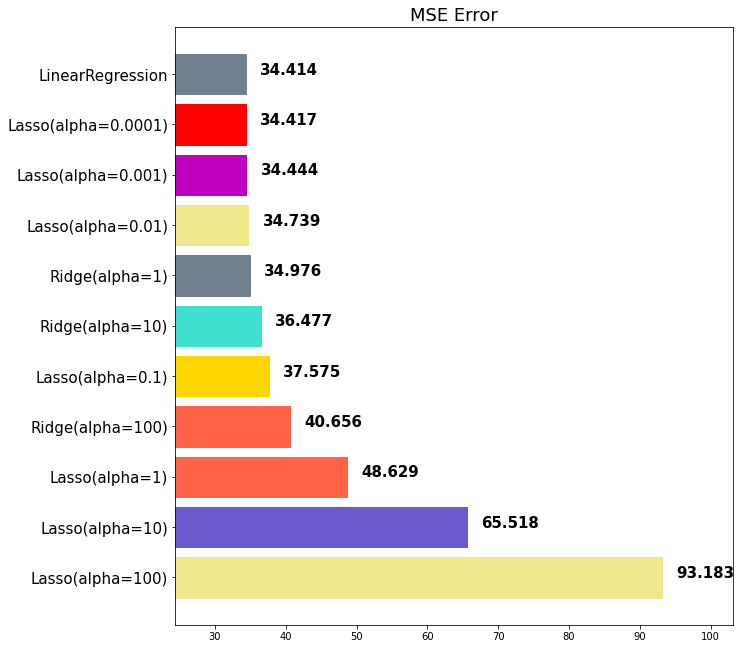

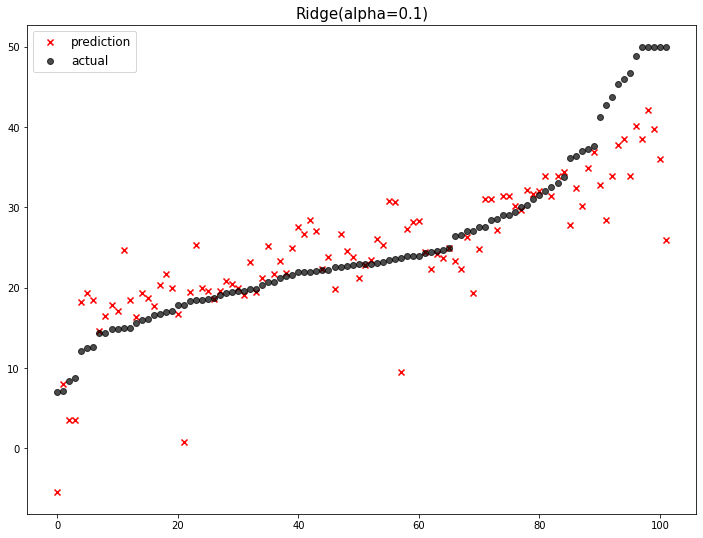

                  model        mse
0      Lasso(alpha=100)  93.182655
1       Lasso(alpha=10)  65.517959
2        Lasso(alpha=1)  48.629275
3      Ridge(alpha=100)  40.655866
4      Lasso(alpha=0.1)  37.574900
5       Ridge(alpha=10)  36.476641
6        Ridge(alpha=1)  34.975698
7     Lasso(alpha=0.01)  34.739042
8      Ridge(alpha=0.1)  34.481418
9    Lasso(alpha=0.001)  34.443610
10  Lasso(alpha=0.0001)  34.416903
11     LinearRegression  34.413968


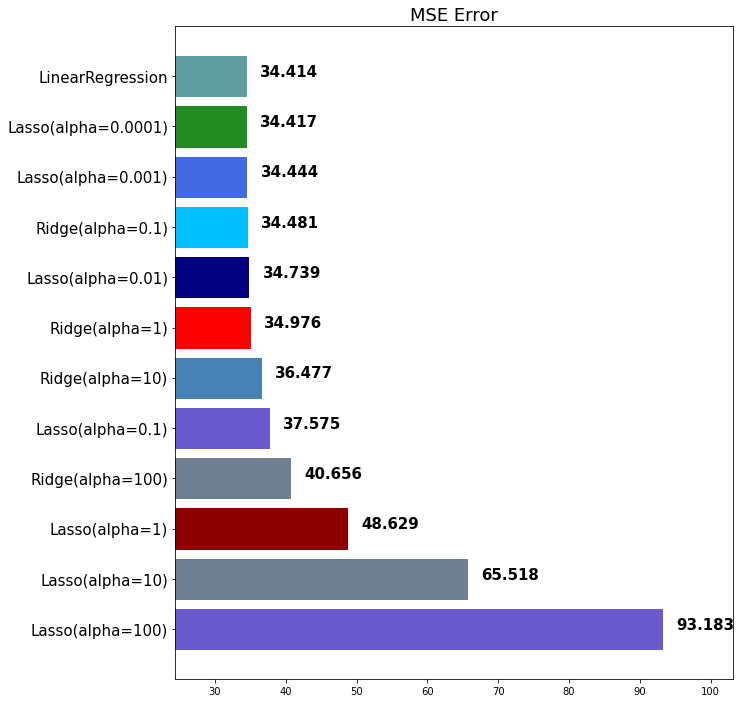

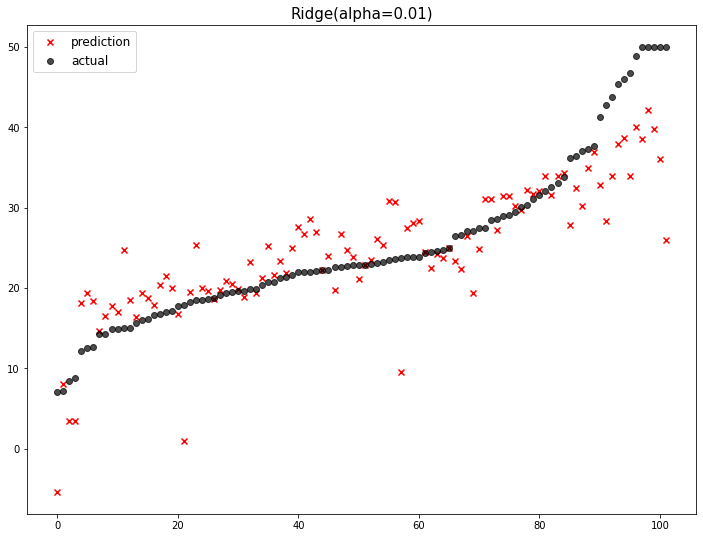

                  model        mse
0      Lasso(alpha=100)  93.182655
1       Lasso(alpha=10)  65.517959
2        Lasso(alpha=1)  48.629275
3      Ridge(alpha=100)  40.655866
4      Lasso(alpha=0.1)  37.574900
5       Ridge(alpha=10)  36.476641
6        Ridge(alpha=1)  34.975698
7     Lasso(alpha=0.01)  34.739042
8      Ridge(alpha=0.1)  34.481418
9    Lasso(alpha=0.001)  34.443610
10    Ridge(alpha=0.01)  34.420749
11  Lasso(alpha=0.0001)  34.416903
12     LinearRegression  34.413968


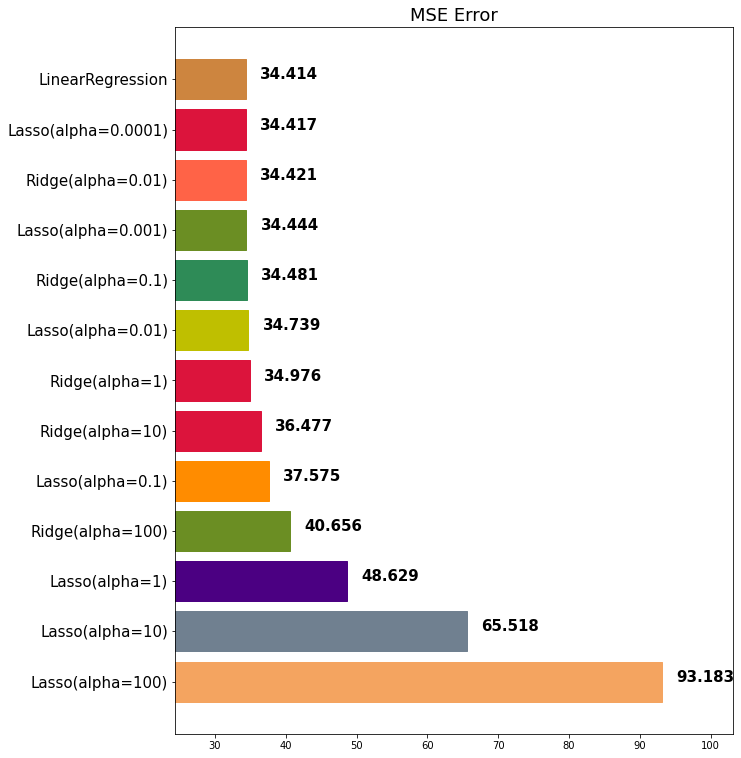

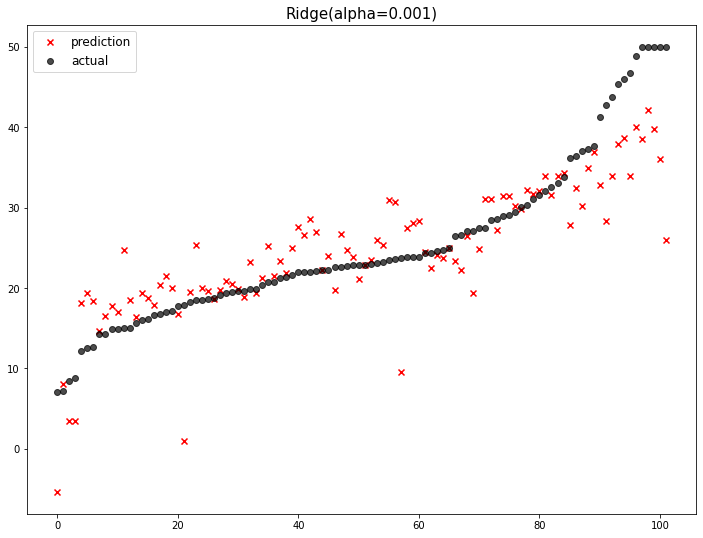

                  model        mse
0      Lasso(alpha=100)  93.182655
1       Lasso(alpha=10)  65.517959
2        Lasso(alpha=1)  48.629275
3      Ridge(alpha=100)  40.655866
4      Lasso(alpha=0.1)  37.574900
5       Ridge(alpha=10)  36.476641
6        Ridge(alpha=1)  34.975698
7     Lasso(alpha=0.01)  34.739042
8      Ridge(alpha=0.1)  34.481418
9    Lasso(alpha=0.001)  34.443610
10    Ridge(alpha=0.01)  34.420749
11  Lasso(alpha=0.0001)  34.416903
12   Ridge(alpha=0.001)  34.414647
13     LinearRegression  34.413968


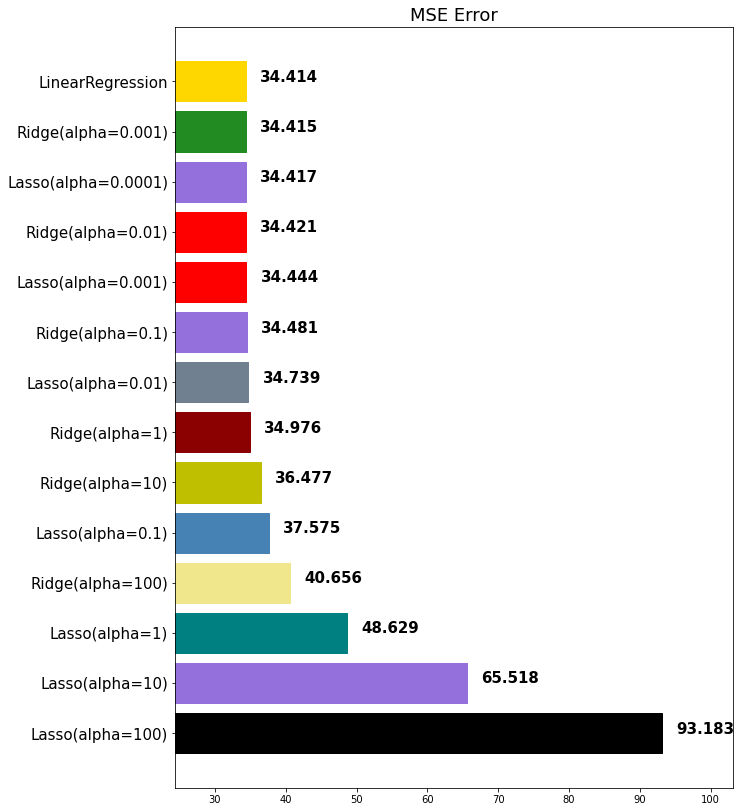

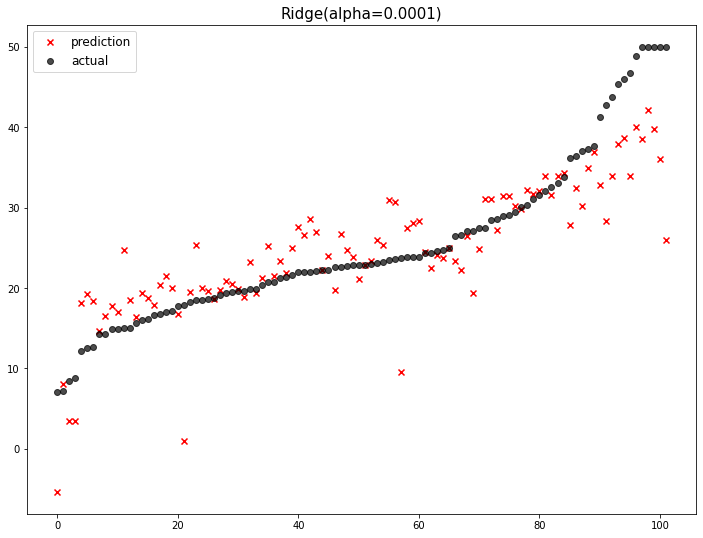

                  model        mse
0      Lasso(alpha=100)  93.182655
1       Lasso(alpha=10)  65.517959
2        Lasso(alpha=1)  48.629275
3      Ridge(alpha=100)  40.655866
4      Lasso(alpha=0.1)  37.574900
5       Ridge(alpha=10)  36.476641
6        Ridge(alpha=1)  34.975698
7     Lasso(alpha=0.01)  34.739042
8      Ridge(alpha=0.1)  34.481418
9    Lasso(alpha=0.001)  34.443610
10    Ridge(alpha=0.01)  34.420749
11  Lasso(alpha=0.0001)  34.416903
12   Ridge(alpha=0.001)  34.414647
13  Ridge(alpha=0.0001)  34.414036
14     LinearRegression  34.413968


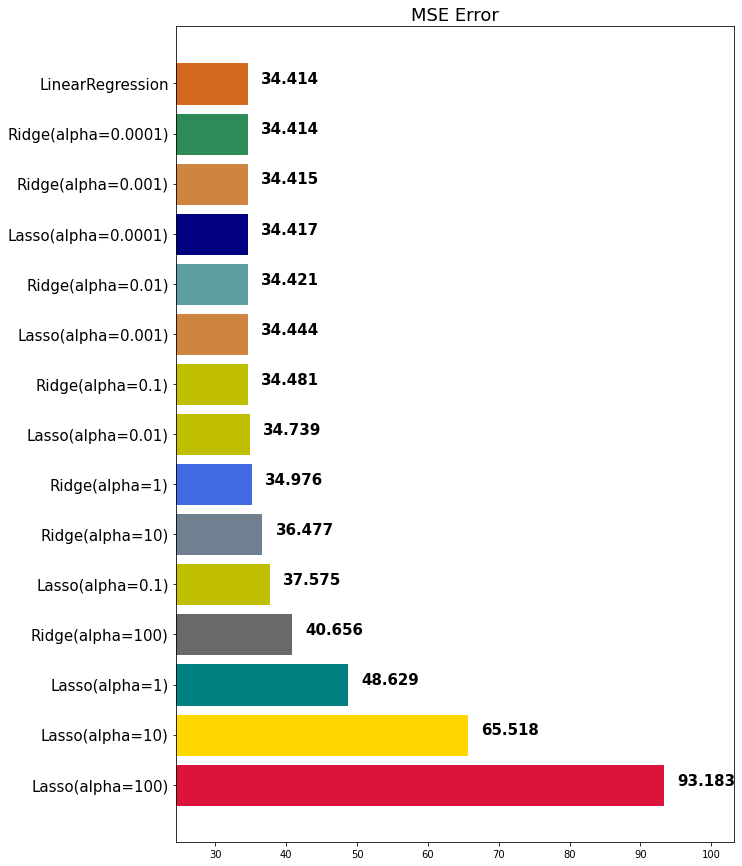

In [48]:
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train, y_train)
  pred = ridge.predict(x_test)
  mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [49]:
x_train.columns # 컬럼이 뭐가 있는지?

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [50]:
ridge.coef_ # coef_ : 기울기값 , 위에 13개의 필드가 학습하는데에 얼마만큼 참여를 하였는가(0에 가까울수록 참여를 안했다.)

array([ -0.12818013,   0.06319833,  -0.00758123,   1.97449397,
       -16.27070423,   3.10846974,   0.01629098,  -1.48299454,
         0.30398508,  -0.01208216,  -0.82029012,   0.01141907,
        -0.58162802])

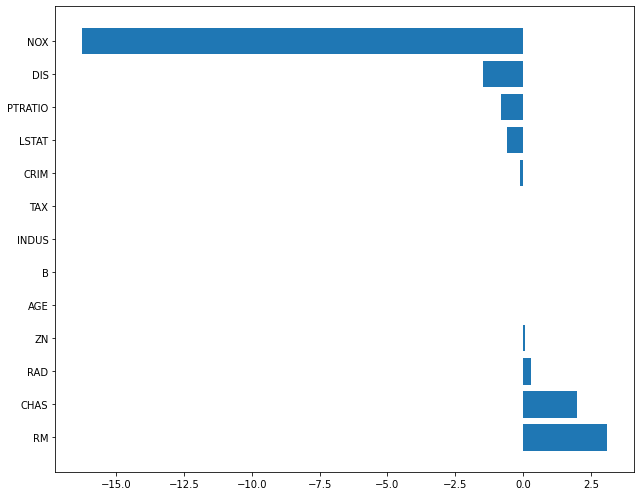

In [51]:
plot_coef(x_train.columns, ridge.coef_)

In [52]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_0001 = Ridge(alpha=0.001)
ridge_0001.fit(x_train, y_train)
ridge_pred_0001 = ridge_0001.predict(x_test)

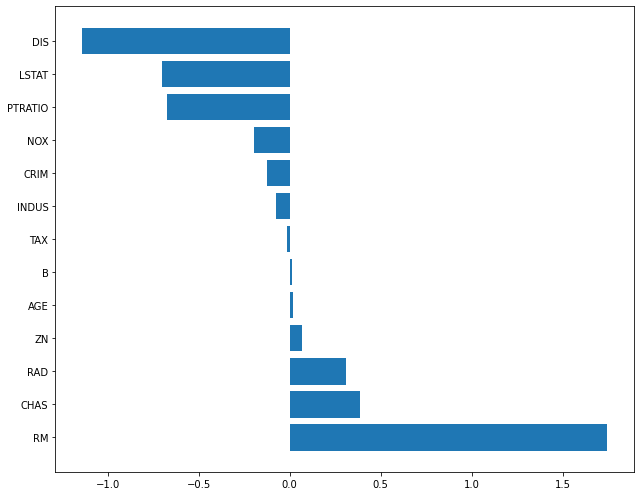

In [53]:
plot_coef(x_train.columns, ridge_100.coef_)

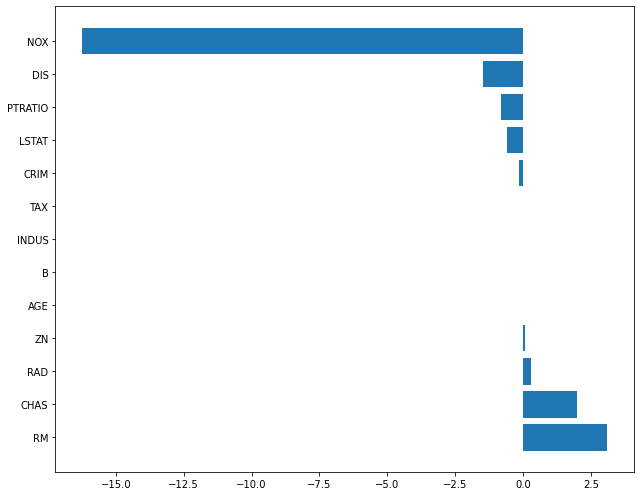

In [54]:
plot_coef(x_train.columns, ridge_0001.coef_)

### 4-3. 엘라스틱넷(ElasticNet)

* l1_ratio(default=0.5) 속성
  * l1_ratio = 0 (L2규제만 사용)
  * l1_ratio = 1 (L1규제만 사용)
  * 0 < l1_ratio < 1 (L1 and L2 규제를 혼합사용) 

In [55]:
from sklearn.linear_model import ElasticNet

In [56]:
ratios = [0.2, 0.5, 0.8]

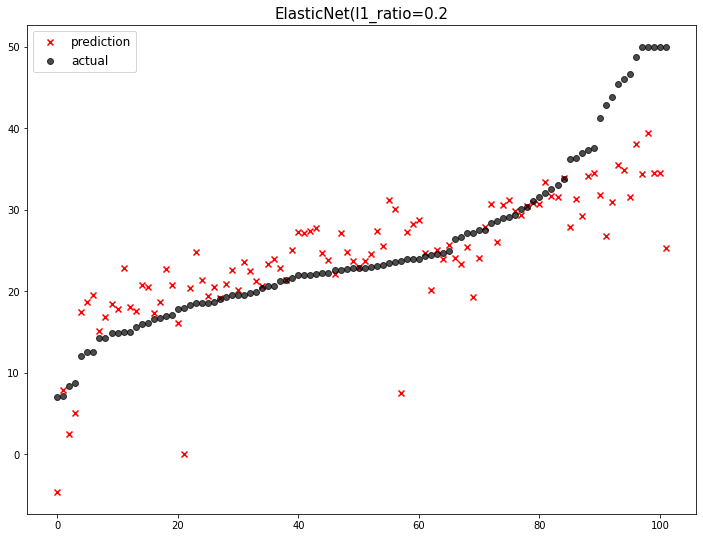

                      model        mse
0          Lasso(alpha=100)  93.182655
1           Lasso(alpha=10)  65.517959
2            Lasso(alpha=1)  48.629275
3   ElasticNet(l1_ratio=0.2  42.890769
4          Ridge(alpha=100)  40.655866
5          Lasso(alpha=0.1)  37.574900
6           Ridge(alpha=10)  36.476641
7            Ridge(alpha=1)  34.975698
8         Lasso(alpha=0.01)  34.739042
9          Ridge(alpha=0.1)  34.481418
10       Lasso(alpha=0.001)  34.443610
11        Ridge(alpha=0.01)  34.420749
12      Lasso(alpha=0.0001)  34.416903
13       Ridge(alpha=0.001)  34.414647
14      Ridge(alpha=0.0001)  34.414036
15         LinearRegression  34.413968


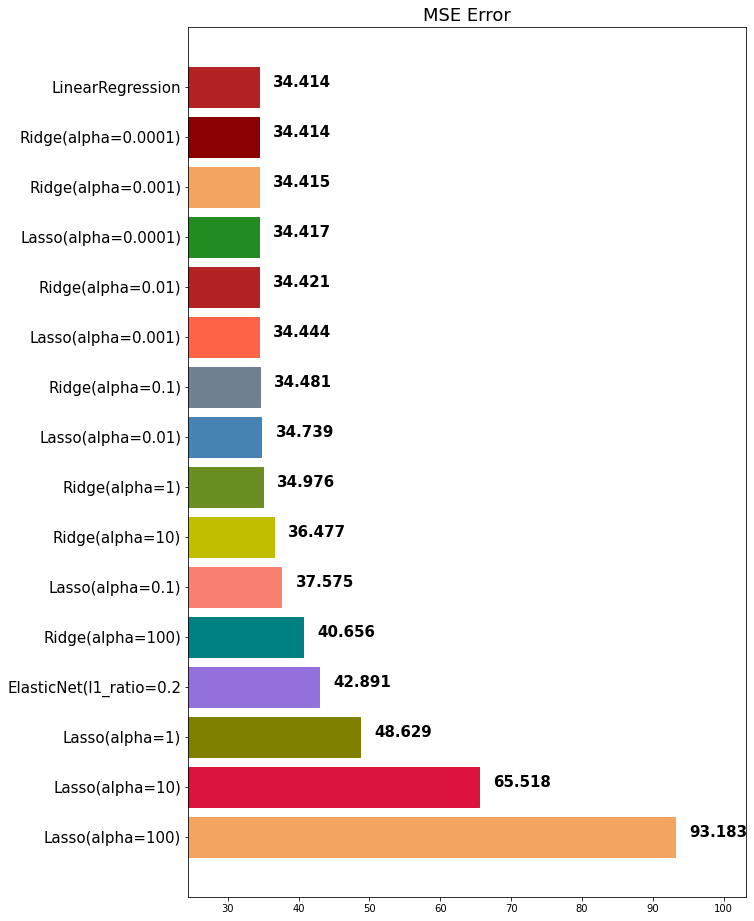

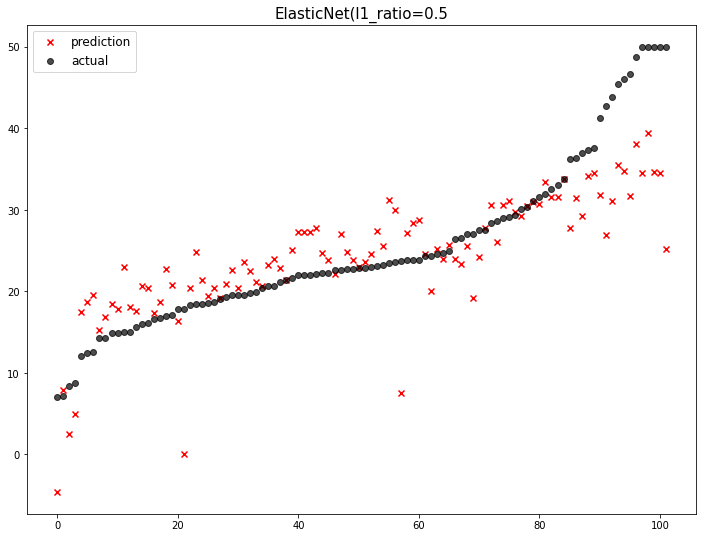

                      model        mse
0          Lasso(alpha=100)  93.182655
1           Lasso(alpha=10)  65.517959
2            Lasso(alpha=1)  48.629275
3   ElasticNet(l1_ratio=0.2  42.890769
4   ElasticNet(l1_ratio=0.5  42.706760
5          Ridge(alpha=100)  40.655866
6          Lasso(alpha=0.1)  37.574900
7           Ridge(alpha=10)  36.476641
8            Ridge(alpha=1)  34.975698
9         Lasso(alpha=0.01)  34.739042
10         Ridge(alpha=0.1)  34.481418
11       Lasso(alpha=0.001)  34.443610
12        Ridge(alpha=0.01)  34.420749
13      Lasso(alpha=0.0001)  34.416903
14       Ridge(alpha=0.001)  34.414647
15      Ridge(alpha=0.0001)  34.414036
16         LinearRegression  34.413968


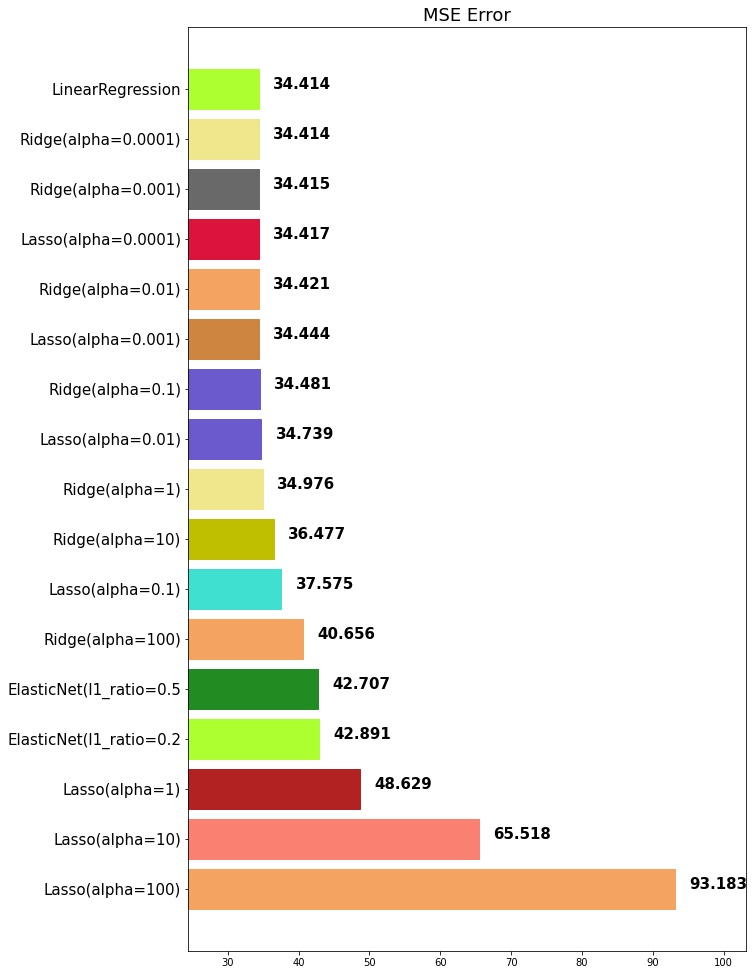

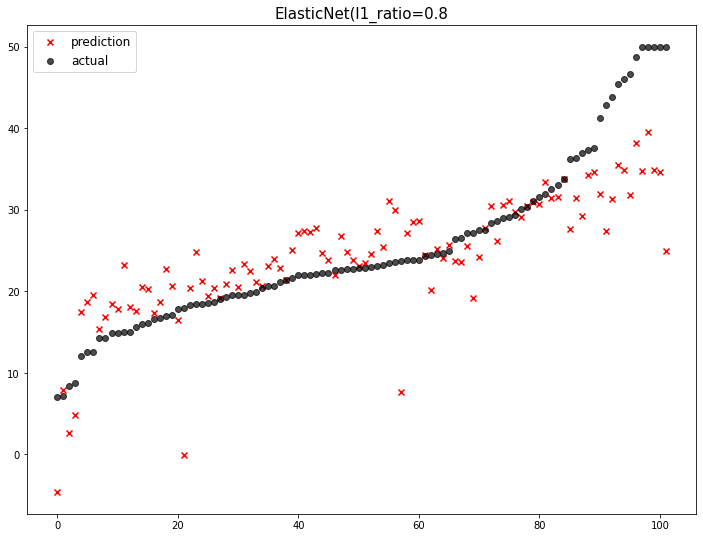

                      model        mse
0          Lasso(alpha=100)  93.182655
1           Lasso(alpha=10)  65.517959
2            Lasso(alpha=1)  48.629275
3   ElasticNet(l1_ratio=0.2  42.890769
4   ElasticNet(l1_ratio=0.5  42.706760
5   ElasticNet(l1_ratio=0.8  42.259644
6          Ridge(alpha=100)  40.655866
7          Lasso(alpha=0.1)  37.574900
8           Ridge(alpha=10)  36.476641
9            Ridge(alpha=1)  34.975698
10        Lasso(alpha=0.01)  34.739042
11         Ridge(alpha=0.1)  34.481418
12       Lasso(alpha=0.001)  34.443610
13        Ridge(alpha=0.01)  34.420749
14      Lasso(alpha=0.0001)  34.416903
15       Ridge(alpha=0.001)  34.414647
16      Ridge(alpha=0.0001)  34.414036
17         LinearRegression  34.413968


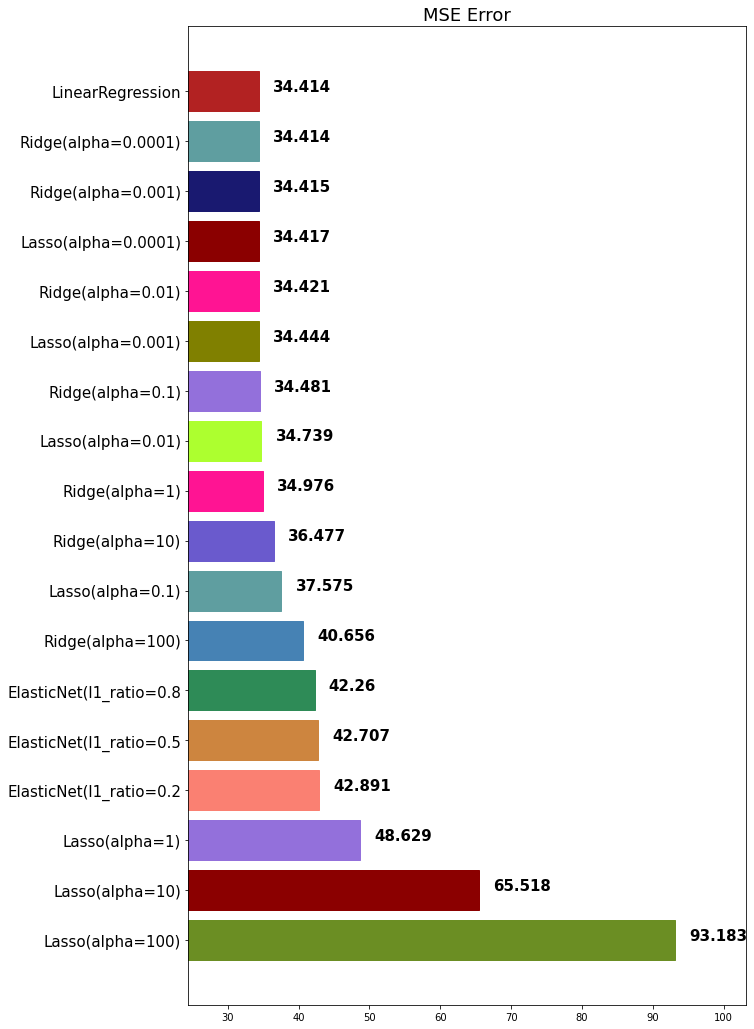

In [57]:
for ratio in ratios:
  elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
  elasticnet.fit(x_train, y_train)
  pred = elasticnet.predict(x_test)
  mse_eval('ElasticNet(l1_ratio={}'.format(ratio), pred, y_test)

# 5. 정규화(Normalize)

* column간에 다른 min, max값을 가지고 있는 경우, 정규화를 통해 최소값/최대값의 척도를 맞춰주는 것

In [58]:
movie = {'naver':[2, 4, 6, 8, 10], 'netflix':[1, 2, 3, 4, 5]}

In [59]:
movie = pd.DataFrame(data=movie)
movie

,naver,netflix
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
min_max_scaler = MinMaxScaler()

In [62]:
min_max_movie = min_max_scaler.fit_transform(movie)

In [63]:
pd.DataFrame(min_max_movie, columns=['naver', 'netflix'])

,naver,netflix
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


# 6. 표준화(Standardization)

* 표준정규분포의 속성을 갖도록 재조정되는 것
* 평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [65]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.909295,11.246287,11.546040,0.066832,0.558671,6.239109,69.218069,3.761290,9.935644,417.232673,18.550990,353.553960,13.062277
std,9.096070,23.750865,6.963179,0.250040,0.117771,0.672026,27.955163,2.131902,8.928212,172.215502,2.142011,95.483144,7.062024
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.083437,0.000000,5.320000,0.000000,0.449000,5.874750,45.675000,2.044600,4.000000,280.750000,17.400000,374.335000,7.525000
50%,0.284585,0.000000,9.900000,0.000000,0.538000,6.163500,77.500000,3.132200,5.000000,345.000000,19.100000,391.305000,11.845000
75%,4.253990,12.500000,18.100000,0.000000,0.631000,6.569000,94.600000,5.035675,24.000000,666.000000,20.200000,396.232500,17.272500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [66]:
std_scaler = StandardScaler()

In [67]:
std_scaled = std_scaler.fit_transform(x_train)

In [68]:
round(pd.DataFrame(std_scaled).describe(), 2) # 소숫점 두자리로 끊어줌

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.43,-0.47,-1.59,-0.27,-1.48,-3.99,-2.38,-1.23,-1.00,-1.34,-2.78,-3.70,-1.58
25%,-0.42,-0.47,-0.90,-0.27,-0.93,-0.54,-0.84,-0.81,-0.67,-0.79,-0.54,0.22,-0.79
50%,-0.40,-0.47,-0.24,-0.27,-0.18,-0.11,0.30,-0.30,-0.55,-0.42,0.26,0.40,-0.17
75%,0.04,0.05,0.94,-0.27,0.61,0.49,0.91,0.60,1.58,1.45,0.77,0.45,0.60
max,9.36,3.74,2.33,3.74,2.66,3.79,1.10,3.93,1.58,1.71,1.61,0.45,3.53


# 7. RobustScaler

* 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 반환
* outlier 값 처리에 유용

In [69]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [70]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7    -0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

# 8. 파이프라인(pipeline)

In [71]:
from sklearn.pipeline import make_pipeline

In [72]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [73]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

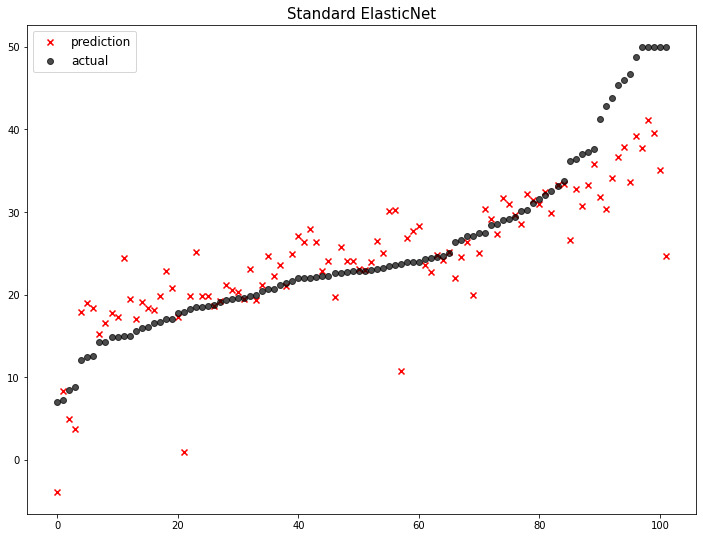

                      model        mse
0          Lasso(alpha=100)  93.182655
1           Lasso(alpha=10)  65.517959
2            Lasso(alpha=1)  48.629275
3   ElasticNet(l1_ratio=0.2  42.890769
4   ElasticNet(l1_ratio=0.5  42.706760
5   ElasticNet(l1_ratio=0.8  42.259644
6          Ridge(alpha=100)  40.655866
7          Lasso(alpha=0.1)  37.574900
8           Ridge(alpha=10)  36.476641
9            Ridge(alpha=1)  34.975698
10        Lasso(alpha=0.01)  34.739042
11      Standard ElasticNet  34.579885
12         Ridge(alpha=0.1)  34.481418
13       Lasso(alpha=0.001)  34.443610
14        Ridge(alpha=0.01)  34.420749
15      Lasso(alpha=0.0001)  34.416903
16       Ridge(alpha=0.001)  34.414647
17      Ridge(alpha=0.0001)  34.414036
18         LinearRegression  34.413968


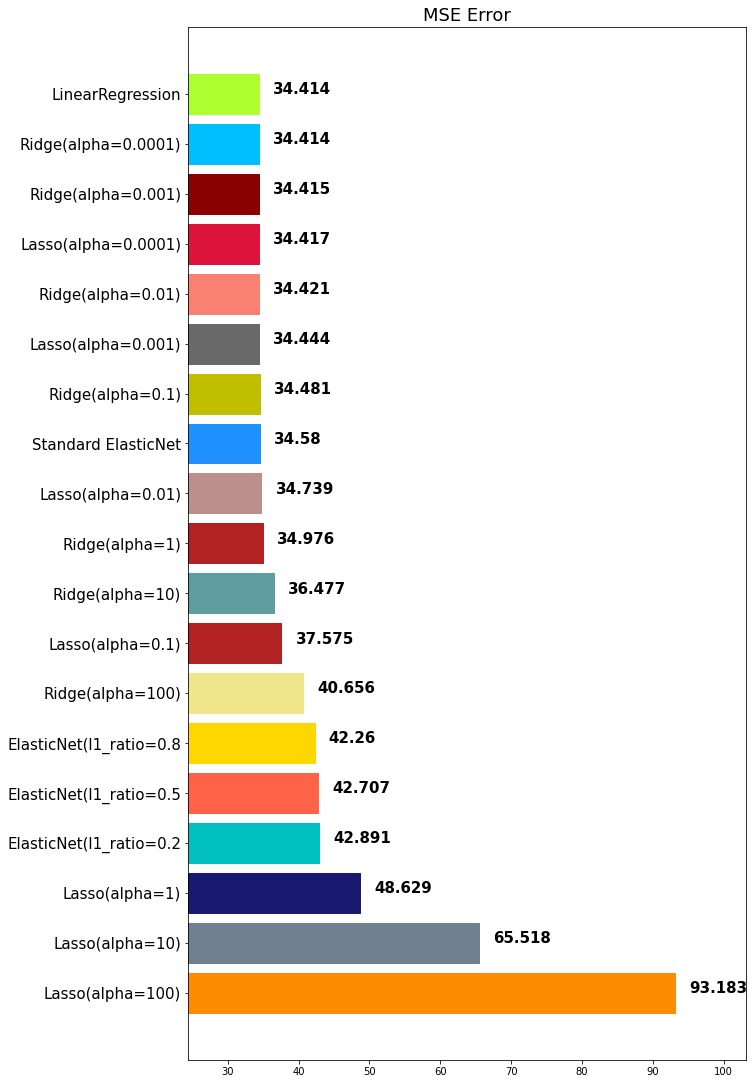

In [74]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

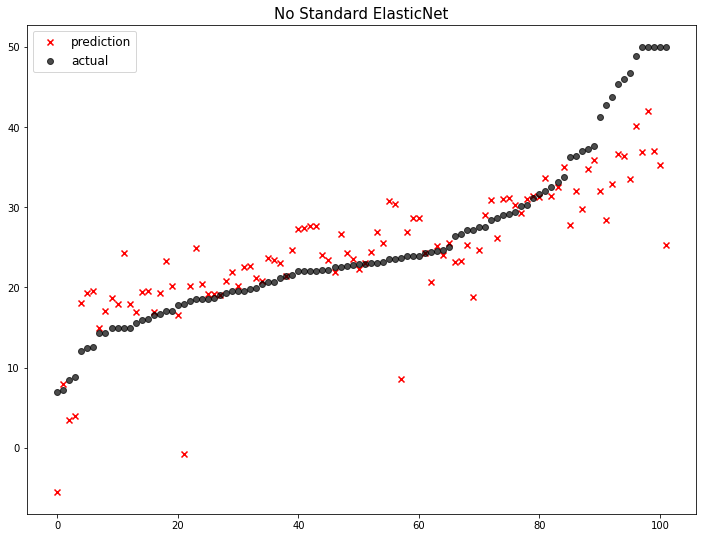

                      model        mse
0          Lasso(alpha=100)  93.182655
1           Lasso(alpha=10)  65.517959
2            Lasso(alpha=1)  48.629275
3   ElasticNet(l1_ratio=0.2  42.890769
4   ElasticNet(l1_ratio=0.5  42.706760
5   ElasticNet(l1_ratio=0.8  42.259644
6          Ridge(alpha=100)  40.655866
7    No Standard ElasticNet  38.275608
8          Lasso(alpha=0.1)  37.574900
9           Ridge(alpha=10)  36.476641
10           Ridge(alpha=1)  34.975698
11        Lasso(alpha=0.01)  34.739042
12      Standard ElasticNet  34.579885
13         Ridge(alpha=0.1)  34.481418
14       Lasso(alpha=0.001)  34.443610
15        Ridge(alpha=0.01)  34.420749
16      Lasso(alpha=0.0001)  34.416903
17       Ridge(alpha=0.001)  34.414647
18      Ridge(alpha=0.0001)  34.414036
19         LinearRegression  34.413968


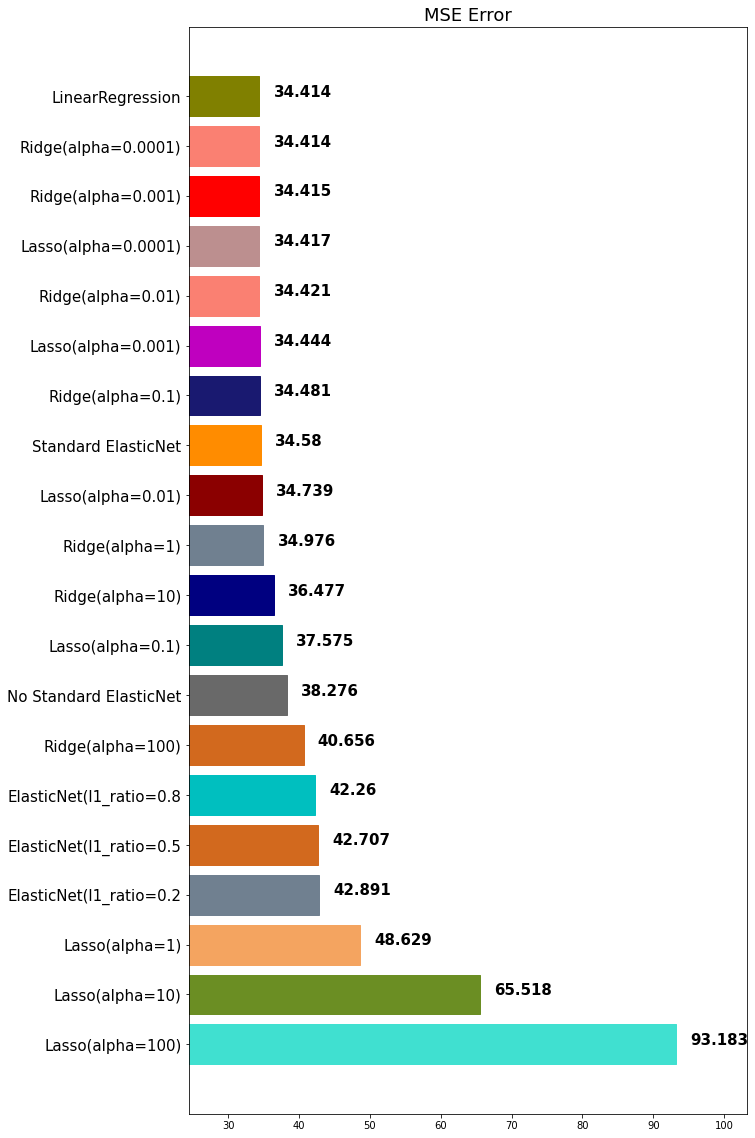

In [75]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', no_pipeline_pred, y_test)

# 9. 다항 회귀(Polynomial Regression)

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)
* 다항식의 계수간 상호작용을 통해 새로운 feature를 생성
* 데이터가 단순한 직선의 형태가 아닌 비선형 형태여도 선형 모델을 사용하여 비선형 데이터를 학습할 수 있음
* 특성의 거듭제곱을 새로운 특성으로 추가하고 확장된 특성을 포함한 데이터셋에 선형 모델을 학습

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [78]:
poly_features = poly.fit_transform(x_train)

In [79]:
poly_features

array([[     0.08873,     21.     ,      5.64   , ..., 156467.7136 ,
          5320.282  ,    180.9025 ],
       [    13.5222 ,      0.     ,     18.1    , ...,  17271.2164 ,
          1751.8286 ,    177.6889 ],
       [     1.61282,      0.     ,      8.14   , ...,  61657.8561 ,
          5050.6254 ,    413.7156 ],
       ...,
       [     2.37857,      0.     ,     18.1    , ..., 137440.7329 ,
          4945.5382 ,    177.9556 ],
       [     0.16902,      0.     ,     25.65   , ..., 148240.4004 ,
          5702.1462 ,    219.3361 ],
       [     0.76162,     20.     ,      3.97   , ..., 153977.76   ,
          4100.58   ,    109.2025 ]])

In [80]:
x_train.iloc[0]

CRIM         0.08873
ZN          21.00000
INDUS        5.64000
CHAS         0.00000
NOX          0.43900
RM           5.96300
AGE         45.70000
DIS          6.81470
RAD          4.00000
TAX        243.00000
PTRATIO     16.80000
B          395.56000
LSTAT       13.45000
Name: 50, dtype: float64

In [81]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [82]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.018e+01, tolerance: 3.109e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


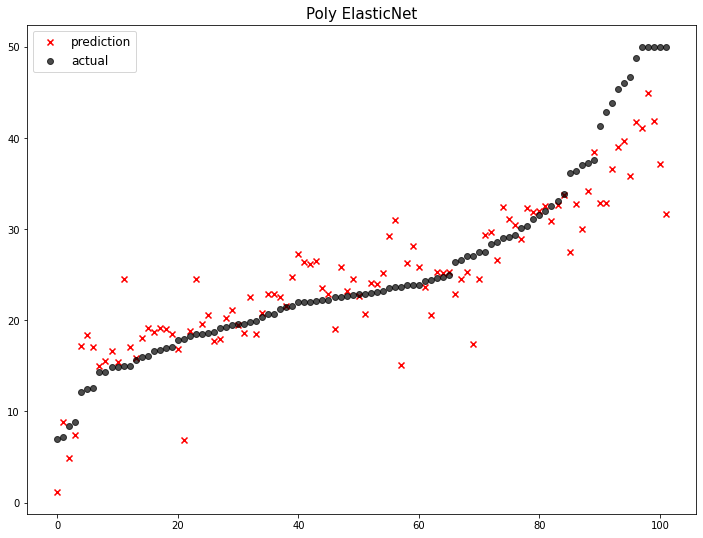

                      model        mse
0          Lasso(alpha=100)  93.182655
1           Lasso(alpha=10)  65.517959
2            Lasso(alpha=1)  48.629275
3   ElasticNet(l1_ratio=0.2  42.890769
4   ElasticNet(l1_ratio=0.5  42.706760
5   ElasticNet(l1_ratio=0.8  42.259644
6          Ridge(alpha=100)  40.655866
7    No Standard ElasticNet  38.275608
8          Lasso(alpha=0.1)  37.574900
9           Ridge(alpha=10)  36.476641
10           Ridge(alpha=1)  34.975698
11        Lasso(alpha=0.01)  34.739042
12      Standard ElasticNet  34.579885
13         Ridge(alpha=0.1)  34.481418
14       Lasso(alpha=0.001)  34.443610
15        Ridge(alpha=0.01)  34.420749
16      Lasso(alpha=0.0001)  34.416903
17       Ridge(alpha=0.001)  34.414647
18      Ridge(alpha=0.0001)  34.414036
19         LinearRegression  34.413968
20          Poly ElasticNet  21.999163


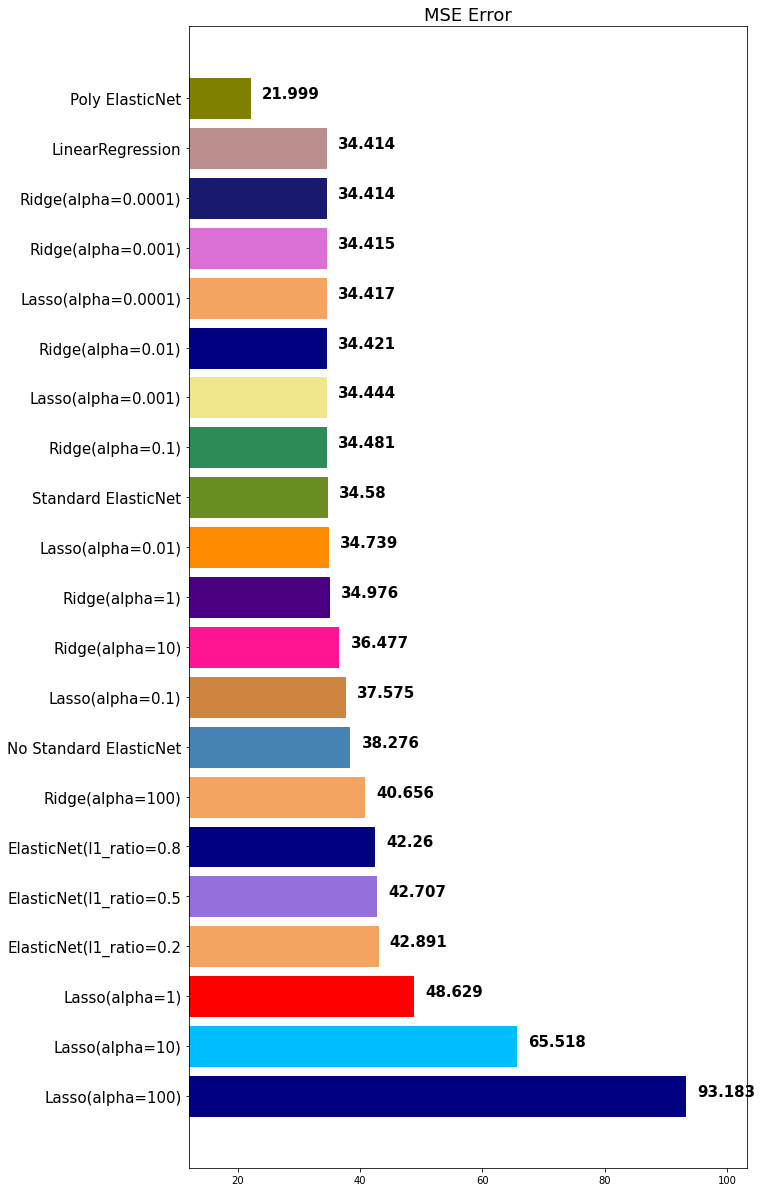

In [83]:
mse_eval('Poly ElasticNet', poly_pred, y_test)